In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
assert torch.__version__.startswith("1.6")
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
%cd drive/My Drive/cyc3600

/content/drive/My Drive/cyc3600


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances('cyclone_ds_train', {}, 'modtrain.json', 'train')
#register_coco_instances('temp_train', {}, 'ftrain80.json', 'train')

In [ ]:
cyclone_metadata = MetadataCatalog.get('cyclone_ds_train')
#cyclone_metadata = MetadataCatalog.get('temp_train')

In [ ]:
dataset_dicts = DatasetCatalog.get('cyclone_ds_train')

[09/26 12:42:33 d2.data.datasets.coco]: Loaded 3934 images in COCO format from modtrain.json


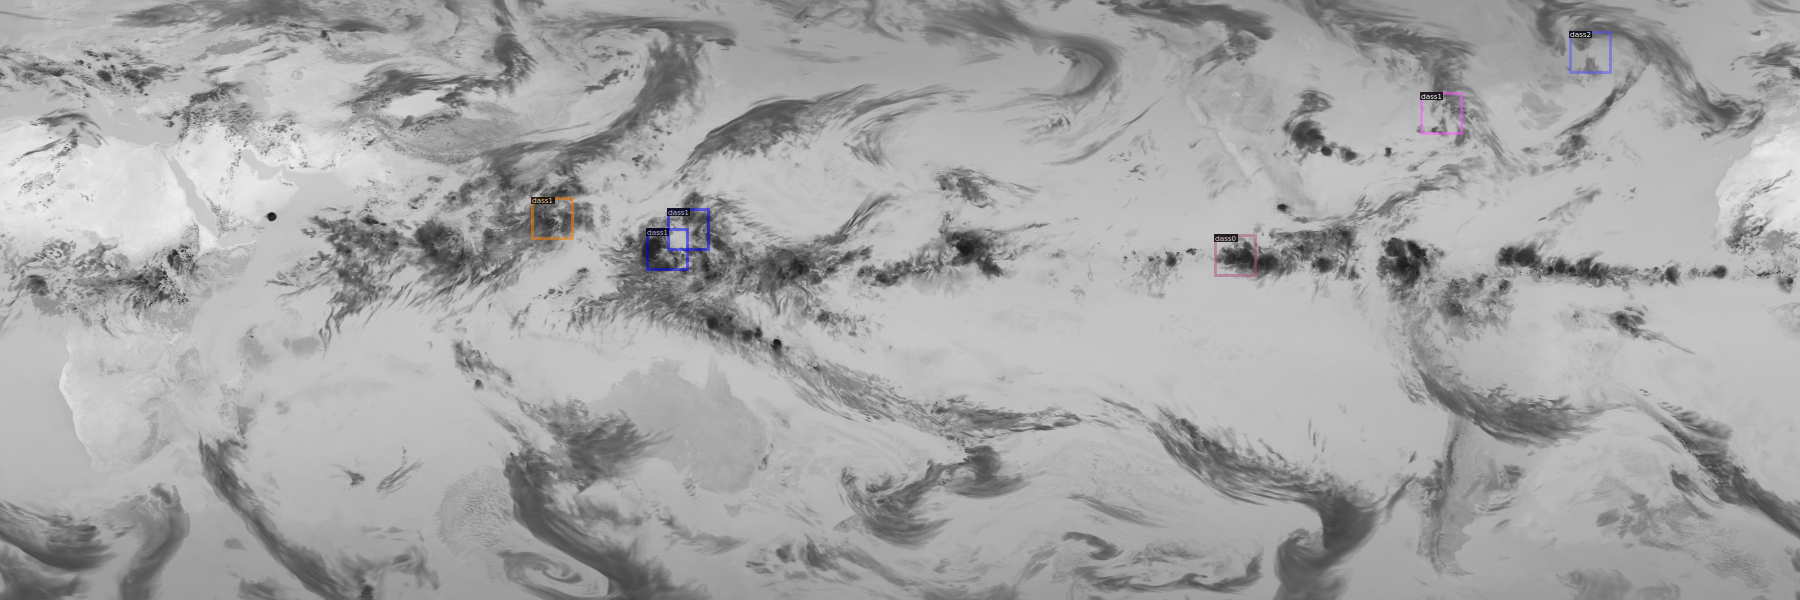

In [ ]:
# import random
# from detectron2.utils.visualizer import Visualizer

# for d in dataset_dicts:
#     if d['file_name'] == 'train/ssd_20180604_12.png':
#         #print(d['file_name'])
#         img = cv2.imread(d["file_name"])
#         visualizer = Visualizer(img[:, :, ::-1], metadata=cyclone_metadata, scale=0.5)
#         vis = visualizer.draw_dataset_dict(d)
#         cv2_imshow(vis.get_image()[:, :, ::-1])

train/ssd_20160617_18.png


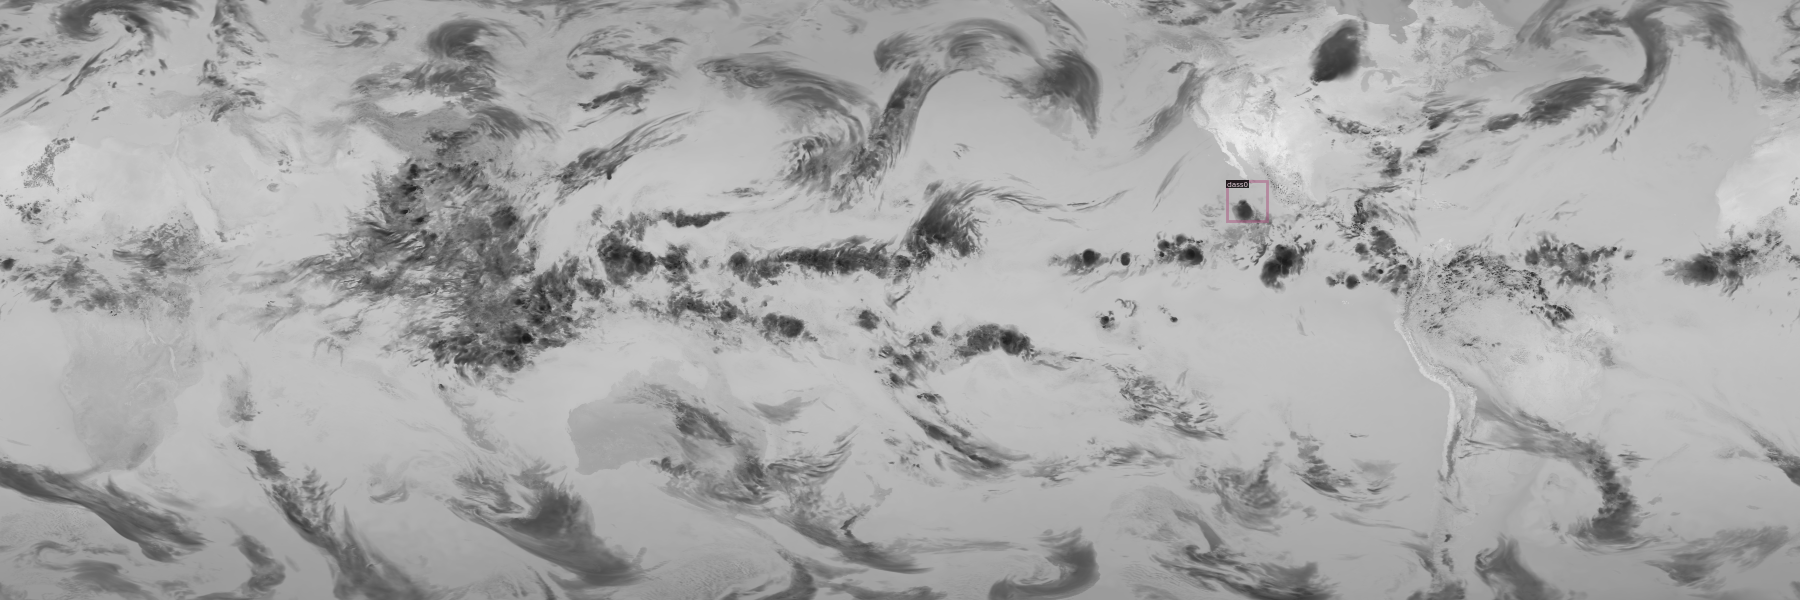

train/ssd_20180707_00.png


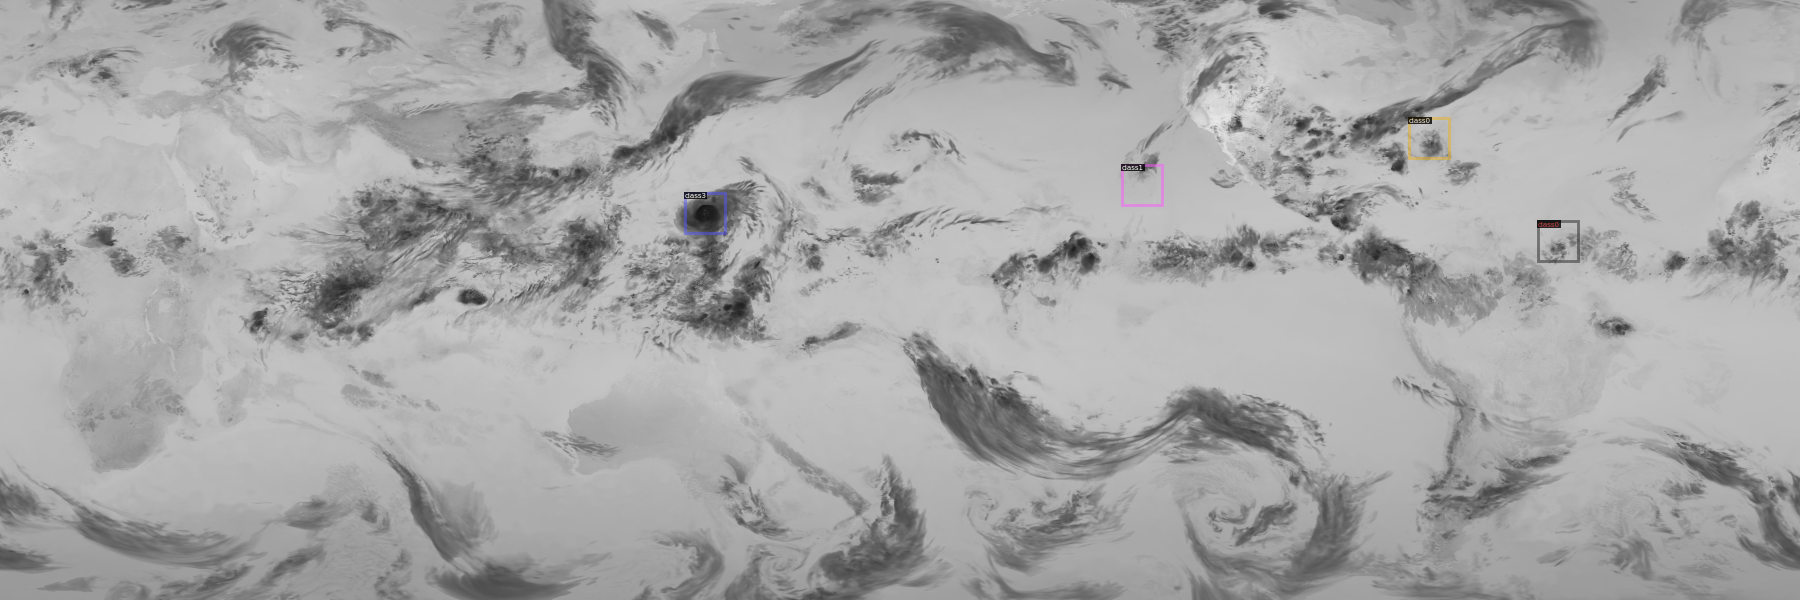

train/ssd_20160719_18.png


train/ssd_20181116_00.png


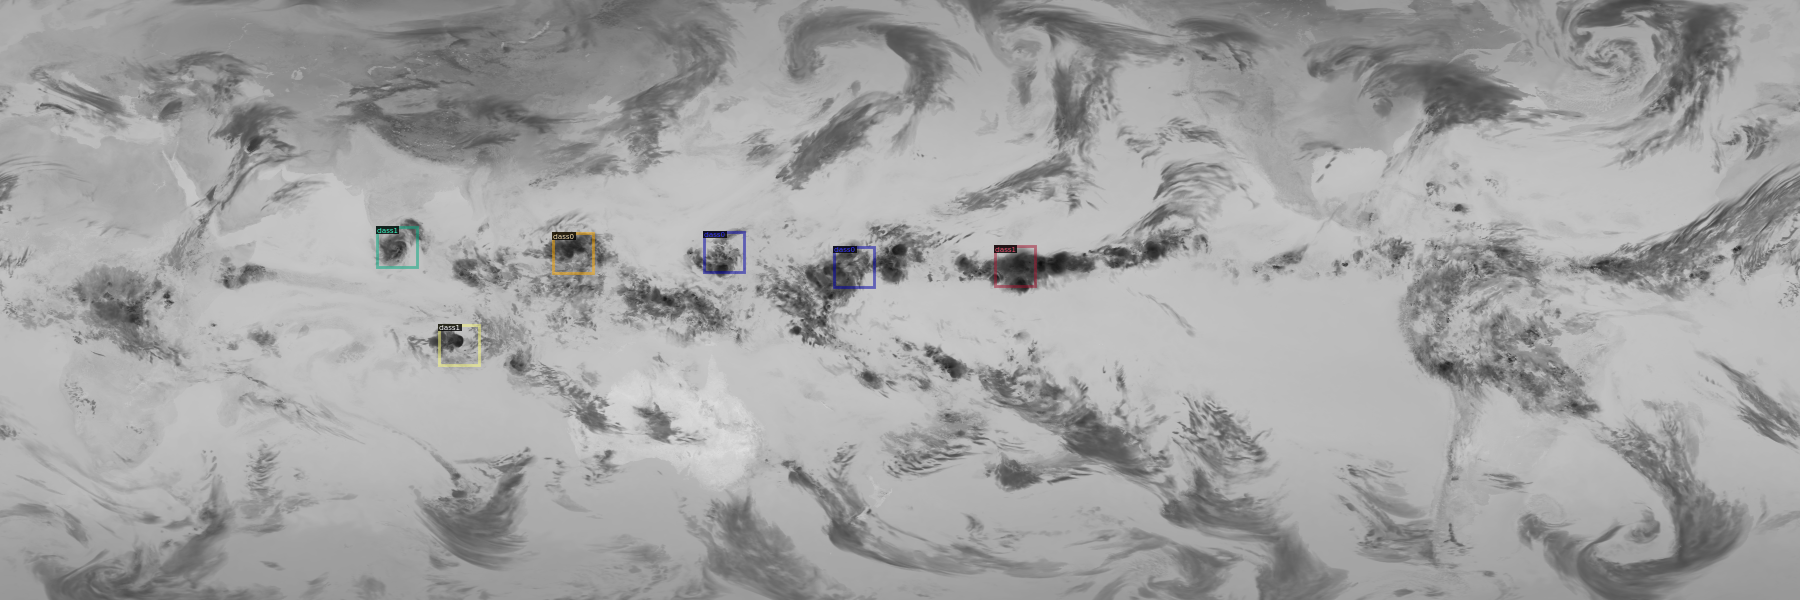

train/ssd_20180331_12.png


train/ssd_20161202_12.png


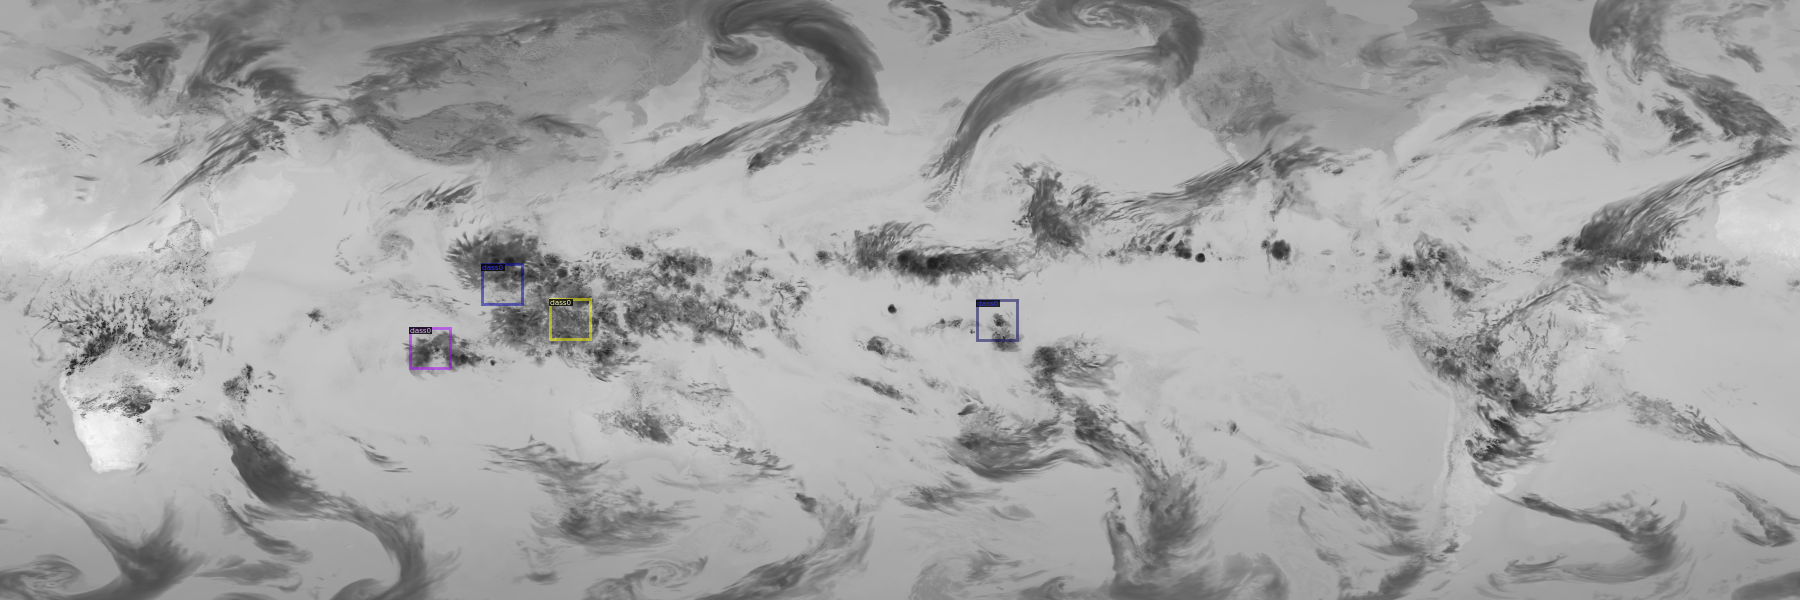

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 6):
    print(d['file_name'])
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=cyclone_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml"))
#cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_DC5_3x.yaml"))
#cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
# cfg.merge_from_file(
#     "./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
# )
cfg.DATASETS.TRAIN = ("cyclone_ds_train",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.002
cfg.SOLVER.MAX_ITER = (
    2000
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    1280
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 3 classes (data, fig, hazelnut)
cfg.INPUT.MAX_SIZE_TEST = 3600
cfg.INPUT.MAX_SIZE_TRAIN = 3600
cfg.INPUT.MIN_SIZE_TEST = 1201
cfg.INPUT.MIN_SIZE_TRAIN = 1201
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[60,70,80,90]]


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

WARNING [09/26 12:43:19 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
[09/26 12:43:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (

R-101.pkl: 179MB [00:20, 8.79MB/s]                           


[09/26 12:43:51 d2.checkpoint.c2_model_loading]: Remapping C2 weights ......
[09/26 12:43:51 d2.checkpoint.c2_model_loading]: backbone.res2.0.conv1.norm.bias                      loaded from res2_0_branch2a_bn_beta           of shape (64,)
[09/26 12:43:51 d2.checkpoint.c2_model_loading]: backbone.res2.0.conv1.norm.running_mean              loaded from res2_0_branch2a_bn_running_mean   of shape (64,)
[09/26 12:43:51 d2.checkpoint.c2_model_loading]: backbone.res2.0.conv1.norm.running_var               loaded from res2_0_branch2a_bn_running_var    of shape (64,)
[09/26 12:43:51 d2.checkpoint.c2_model_loading]: backbone.res2.0.conv1.norm.weight                    loaded from res2_0_branch2a_bn_gamma          of shape (64,)
[09/26 12:43:51 d2.checkpoint.c2_model_loading]: backbone.res2.0.conv1.weight                         loaded from res2_0_branch2a_w                 of shape (64, 64, 1, 1)
[09/26 12:43:51 d2.checkpoint.c2_model_loading]: backbone.res2.0.conv2.norm.bias                   

/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


[09/26 12:44:53 d2.utils.events]:  eta: 1:33:39  iter: 19  total_loss: 1.918  loss_cls: 1.096  loss_box_reg: 0.020  loss_rpn_cls: 0.648  loss_rpn_loc: 0.120  time: 2.8416  data_time: 0.0459  lr: 0.000040  max_mem: 8315M
[09/26 12:45:50 d2.utils.events]:  eta: 1:32:44  iter: 39  total_loss: 0.735  loss_cls: 0.119  loss_box_reg: 0.016  loss_rpn_cls: 0.530  loss_rpn_loc: 0.071  time: 2.8478  data_time: 0.0031  lr: 0.000080  max_mem: 8315M
[09/26 12:46:48 d2.utils.events]:  eta: 1:32:47  iter: 59  total_loss: 0.480  loss_cls: 0.086  loss_box_reg: 0.013  loss_rpn_cls: 0.329  loss_rpn_loc: 0.046  time: 2.8585  data_time: 0.0031  lr: 0.000120  max_mem: 8315M
[09/26 12:47:45 d2.utils.events]:  eta: 1:31:34  iter: 79  total_loss: 0.354  loss_cls: 0.080  loss_box_reg: 0.017  loss_rpn_cls: 0.219  loss_rpn_loc: 0.049  time: 2.8583  data_time: 0.0031  lr: 0.000160  max_mem: 8315M
[09/26 12:48:42 d2.utils.events]:  eta: 1:30:34  iter: 99  total_loss: 0.352  loss_cls: 0.080  loss_box_reg: 0.028  loss

In [ ]:
register_coco_instances('cyclone_ds_val', {}, 'modval.json', 'val')

In [ ]:
val_metadata = MetadataCatalog.get('cyclone_ds_val')
val_dicts = DatasetCatalog.get('cyclone_ds_val')

[09/26 14:26:42 d2.data.datasets.coco]: Loaded 1407 images in COCO format from modval.json


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#cfg.MODEL.WEIGHTS = os.path.join('b80-R101-DC5-3x', "model_final.pth")
#cfg.MODEL.WEIGHTS = '/content/drive/My Drive/cyc1440/output/model_final.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4 # set the testing threshold for this model
cfg.DATASETS.TEST = ("cyclone_ds_val", )
predictor = DefaultPredictor(cfg)

WARNING [09/26 14:26:50 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in val_dicts:
    print(d['file_name'])
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)

# for d in random.sample(val_dicts, 15):
#     print(d['file_name'])
#     im = cv2.imread(d["file_name"])
#     outputs = predictor(im)
#     print(outputs)

val/ssd_20190101_00.png
{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1062.4683,  480.1036, 1148.7588,  568.8526]], device='cuda:0')), scores: tensor([0.4501], device='cuda:0'), pred_classes: tensor([1], device='cuda:0')])}
val/ssd_20190101_06.png
{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1060.2930,  487.7302, 1142.4272,  568.1378]], device='cuda:0')), scores: tensor([0.4105], device='cuda:0'), pred_classes: tensor([1], device='cuda:0')])}
val/ssd_20190101_12.png
{'instances': Instances(num_instances=0, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64)])}
val/ssd_20190101_18.png
{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1055.1923

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dicts, 30):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)

{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1766.6263,  767.2626, 1853.0863,  843.9902]], device='cuda:0')), scores: tensor([0.6914], device='cuda:0'), pred_classes: tensor([2], device='cuda:0')])}
{'instances': Instances(num_instances=7, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[2764.1580,  250.5988, 2839.6052,  323.8986],
        [1220.9802,  311.4519, 1283.7466,  387.8825],
        [3212.8594,  335.6929, 3294.6841,  415.0166],
        [2372.9224,  358.5529, 2455.3828,  435.3699],
        [2372.7576,  358.9794, 2451.2341,  436.7451],
        [1511.5150,  365.1193, 1591.1564,  443.4827],
        [1204.1085,  310.5969, 1296.9991,  385.5984]], device='cuda:0')), scores: tensor([0.9045, 0.7076, 0.5437, 0.5163, 0.4969, 0.4711, 0.4418],
       device='cuda:0'), pred_classes: tensor([3, 3, 2, 2, 3, 2, 2], device='cuda:0')])}
{'instances': Instances(num_instances=3, image_height=1201, image_wid

In [ ]:
# from detectron2.modeling import build_model
# model = build_model(cfg)

# from detectron2.checkpoint import DetectionCheckpointer
# DetectionCheckpointer(model).load('b80-R101-DC5-3x/model_final.pth')

temp_val_dict = val_dicts[:2]

print(temp_val_dict)
for each in temp_val_dict:
    print(each)

# model.eval()
# with torch.no_grad():
#     outputs = model(val_dicts[:10])

# for d in random.sample(val_dicts, 10):
#     print(d)
#     im = cv2.imread(d["file_name"])
#     outputs = predictor(im)
#     print(outputs)


[{'file_name': 'val/ssd_20190101_00.png', 'height': 1201, 'width': 3600, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [3121, 44, 80, 80], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1373, 689, 80, 80], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [2228, 493, 80, 80], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1603, 652, 80, 80], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1684, 639, 80, 80], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1757, 720, 80, 80], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1069, 495, 80, 80], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}, {'file_name': 'val/ssd_20190101_06.png', 'height': 1201, 'width': 3600, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [3132, 27, 80, 80], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {

In [ ]:
for d in random.sample(dataset_dicts, 6):
    print(d['file_name'])
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=cyclone_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])


from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_balloon_dicts("balloon/val")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.5)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])